In [1]:
#Downloading the Titanic dataset from Kaggle and save it to orig_df, a copy is provided with this exercise and you can upload it to your drive folder.
import pandas as pd
df = pd.read_csv('/Users/dawidfroncisz/Desktop/AI-Lab-Tasks/Session 5/titanic3.csv')
orig_df = df

In [2]:
#Explore the Titanic dataset
#Print all samples and check how many samples and features the Titanic dataset has
print(orig_df)


      pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex    age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00  

In [3]:
#Check the type of each variable (data type)
#int type is ok, float64 is ok as well but you may change it to int, object type need to be changed to int (object is a string in pandas and perform a string operation)
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [4]:
# convert string labels (object) into numbers
d = {'female': 0, 'male': 1}
df['sex'] = df['sex'].map(d)

from sklearn import preprocessing
# the same using LabelEncoder
le = preprocessing.LabelEncoder()
df['name'] = le.fit_transform(df['name'])
df['ticket'] = le.fit_transform(df['ticket'])
df['cabin'] = le.fit_transform(df['cabin'])
df['embarked'] = le.fit_transform(df['embarked'])
df['boat'] = le.fit_transform(df['boat'])
df['home.dest'] = le.fit_transform(df['home.dest'])
print(df)

      pclass  survived  name  sex    age  sibsp  parch  ticket      fare  \
0          1         1    21    0  29.00      0      0     187  211.3375   
1          1         1    23    1   0.92      1      2      49  151.5500   
2          1         0    24    0   2.00      1      2      49  151.5500   
3          1         0    25    1  30.00      1      2      49  151.5500   
4          1         0    26    0  25.00      1      2      49  151.5500   
...      ...       ...   ...  ...    ...    ...    ...     ...       ...   
1304       3         0  1291    0  14.50      1      0     259   14.4542   
1305       3         0  1292    0    NaN      1      0     259   14.4542   
1306       3         0  1293    1  26.50      0      0     250    7.2250   
1307       3         0  1294    1  27.00      0      0     264    7.2250   
1308       3         0  1295    1  29.00      0      0     346    7.8750   

      cabin  embarked  boat   body  home.dest  
0        43         2    11    NaN     

In [5]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,21,0,29.00,0,0,187,211.3375,43,2,11,NaN,308
1,1,1,23,1,0.92,1,2,49,151.5500,79,2,2,NaN,230
2,1,0,24,0,2.00,1,2,49,151.5500,79,2,27,NaN,230
3,1,0,25,1,30.00,1,2,49,151.5500,79,2,27,135.0,230
4,1,0,26,0,25.00,1,2,49,151.5500,79,2,27,NaN,230


In [34]:
# fill missing value 'age' and 'fare'
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

# drop 'cabin' and 'body' columns
df.drop(columns=['cabin', 'body'], inplace=True)

In [6]:
#Use shape attribute to check the raws (samples) and columns (features)
df.shape

(1309, 14)

In [7]:
#Use describe attribute to explore the data statistics
#Can you let me a little bit about the data, for example the age groups
# Most passengers were between 22 and 35 years old, the medium is 28 years, min only 0.17 years and max. 80 years
df.describe()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,121.000000,1309.000000
mean,2.294882,0.381971,652.689076,0.644003,29.881138,0.498854,0.385027,463.625668,33.295479,165.897632,1.495034,21.576776,160.809917,270.578304
std,0.837836,0.486055,377.309849,0.478997,14.413493,1.041658,0.865560,278.069490,51.758668,44.787506,0.816130,8.485711,97.696922,115.430272
min,1.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,326.000000,0.000000,21.000000,0.000000,0.000000,212.000000,7.895800,186.000000,1.000000,17.000000,72.000000,195.000000
50%,3.000000,0.000000,652.000000,1.000000,28.000000,0.000000,0.000000,459.000000,14.454200,186.000000,2.000000,27.000000,155.000000,323.000000
75%,3.000000,1.000000,979.000000,1.000000,39.000000,1.000000,0.000000,727.000000,31.275000,186.000000,2.000000,27.000000,256.000000,369.000000
max,3.000000,1.000000,1306.000000,1.000000,80.000000,8.000000,9.000000,928.000000,512.329200,186.000000,3.000000,27.000000,328.000000,369.000000


In [8]:
#Use describe attribute at different location to explore the data statistics
#Use 3 or 4 instead of 2 to include more features (this is useful when you have lots of features)
df.describe().iloc[:,:4]

,pclass,survived,name,sex
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,652.689076,0.644003
std,0.837836,0.486055,377.309849,0.478997
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,326.000000,0.000000
50%,3.000000,0.000000,652.000000,1.000000
75%,3.000000,1.000000,979.000000,1.000000
max,3.000000,1.000000,1306.000000,1.000000


In [9]:
#Use isnull() to find columns or rows with missing values and sum them up to get the total of missing values
#Which features are the leak features?
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin           0
embarked        0
boat            0
body         1188
home.dest       0
dtype: int64

In [10]:
#We can create a boolean array (a series with True or False to indicate if a row (a sample) has missing data)
#and use it to inspect rows that are missing data
mask = df.isnull()

In [11]:
mask.head()  # rows

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [12]:
#Let's improve the process by using the function any that iterate through each row and return true for any x in the raw = true
mask = df.isnull().any(axis=1)

In [13]:
mask.head()

0     True
1     True
2     True
3    False
4     True
dtype: bool

In [14]:
df[mask].body.head() # check body column

0   NaN
1   NaN
2   NaN
4   NaN
5   NaN
Name: body, dtype: float64

In [15]:
df[mask].age.head() # check age column


0    29.00
1     0.92
2     2.00
4    25.00
5    48.00
Name: age, dtype: float64

In [16]:
df[mask].embarked.head() # check embarked column

0    2
1    2
2    2
4    2
5    2
Name: embarked, dtype: int64

In [17]:
#Use the .value_counts method to examine the counts of the values:
df.sex.value_counts(dropna=False) # How many male and female
# Assign dropna to false if you don't want to delete the missing values

sex
1    843
0    466
Name: count, dtype: int64

In [18]:
#Use the .value_counts method to examine the counts of the values:
df.embarked.value_counts(dropna=False)

embarked
2    914
0    270
1    123
3      2
Name: count, dtype: int64

In [19]:
#Use the .value_counts method to examine the counts of the values:
df.age.value_counts(dropna=False)

age
NaN      263
24.00     47
22.00     43
21.00     41
30.00     40
        ... 
66.00      1
0.67       1
76.00      1
67.00      1
26.50      1
Name: count, Length: 99, dtype: int64

In [20]:
#Delete raws with high percentage of missing values
df = df.drop(
     columns=[
         "name",
         "ticket",
         "home.dest",
         "boat",
         "body",
         "cabin",
     ]
 )

In [21]:
#Use the attribute describe to check whether you managed to delete the columns
#Compare it with the above df.describe()
df.describe()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,0.381971,0.644003,29.881138,0.498854,0.385027,33.295479,1.495034
std,0.837836,0.486055,0.478997,14.413493,1.041658,0.865560,51.758668,0.816130
min,1.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,0.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,1.000000,39.000000,1.000000,0.000000,31.275000,2.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200,3.000000


In [22]:
#Working with missing data

#Populate age missing values with thier median

df['age'] = df['age'].fillna(df['age'].median())

#Populate embarked missing values with high occurrence value

df['embarked'] = df['embarked'].fillna('S')

# map sex to a numeric type
df.sex = df.sex.map({'male': 1, 'female': 0})

# map embarked to a numeric type
df.embarked = df.embarked.map({'S': 2, 'C': 1, 'Q':0})

#fill any other missing value with 0 (is not good practice but to avoid common error of NaN value still exist)
df.fillna(0,inplace=True)

In [23]:
print(df.sex)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1304    0.0
1305    0.0
1306    0.0
1307    0.0
1308    0.0
Name: sex, Length: 1309, dtype: float64


In [24]:
#Splitting data into training and testing datasets
from sklearn.model_selection import train_test_split
#Assign survived column (targets) to y
y = df.survived
#Delete survived column from X (samples)
X = df.drop(columns="survived")
#Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [25]:
#check the y_train (target)
print(y_train)

1182    1
1106    0
558     1
1125    0
793     0
       ..
583     1
332     0
1293    0
1115    0
1104    0
Name: survived, Length: 916, dtype: int64


In [26]:
#check the X_train (samples)
print(X_train)

      pclass  sex   age  sibsp  parch     fare  embarked
1182       3  0.0  21.0      0      0   7.6500       0.0
1106       3  0.0  41.0      0      5  39.6875       0.0
558        2  0.0  18.0      0      2  13.0000       0.0
1125       3  0.0  24.0      0      0   8.0500       0.0
793        3  0.0  47.0      0      0   7.2500       0.0
...      ...  ...   ...    ...    ...      ...       ...
583        2  0.0  40.0      0      0  15.7500       0.0
332        2  0.0  23.0      0      0  10.5000       0.0
1293       3  0.0  28.0      0      0   8.0500       0.0
1115       3  0.0  28.0      0      0   7.7750       0.0
1104       3  0.0  16.0      4      1  39.6875       0.0

[916 rows x 7 columns]


In [27]:
#call the ML algorithm
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [30]:
#Get the predicted and expected
#Can you tell what is predicted and expected values represent?
# The predicted values are the outputs of trained model with test data X_test and class labels 0 or 1
# The expected values are the true labels from dataset y_test. These represent the actual outcomes for the test instances
#Can you derive the misclassified values (wrong)
predicted = clf.predict(X=X_test)
expected = y_test


In [31]:
#derive the misclassified values (wrong)
import numpy as np
# create a list of tuples containing mismatches between predictions and expected labels
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [32]:
#display incorrect predictions
wrong

[(0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 

In [33]:
#Now print the model accuracy
print(f'{clf.score(X_test, y_test):.2%}')
clf.predict(X_test)

68.45%


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,

In [ ]:
#Can you evaluate and validate the model using k-fold?
#Can you get the confusion matrix?

In [35]:
# import KFold to split data in train/test sets
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

In [36]:
# set up k-fold cross-validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [37]:
# Evaluate the model using cross-validation
scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')

In [38]:
#display the results
print(f"Accuracy for each fold: {scores}")
print(f"Mean accuracy: {scores.mean():.2f}")
print(f"Standard deviation of accuracy: {scores.std():.2f}")


Accuracy for each fold: [0.64122137 0.66412214 0.72519084 0.69465649 0.73282443 0.70992366
 0.70229008 0.70229008 0.6870229  0.66153846]
Mean accuracy: 0.69
Standard deviation of accuracy: 0.03


In [39]:
#import libraries
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Get predictions 
predicted = clf.predict(X_test)

In [41]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predicted)

In [42]:
#display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[211  30]
 [ 94  58]]


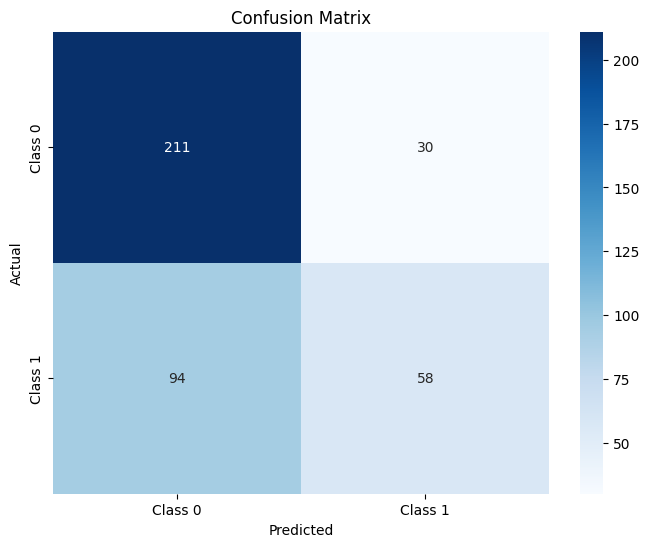

In [43]:
#visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, predicted))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       241
           1       0.66      0.38      0.48       152

    accuracy                           0.68       393
   macro avg       0.68      0.63      0.63       393
weighted avg       0.68      0.68      0.66       393



In [45]:
#Save and test the model
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(clf)

# Load the pickled model
clf_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
clf_from_pickle.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,

In [46]:
# To save a machine learning model produced by scikit-learn (sklearn), you can use Python's joblib library,
# which is often preferred for saving scikit-learn models due to its efficiency.

#First, ensure you have the joblib library installed. If you don't have it, you can install it using pip:

# pip install joblib

# Once you have your scikit-learn model trained and ready to save, import joblib:
import joblib


# Save the model as a pickle in a file
# You can use the joblib.dump() function. Provide the model and the file path where you want to save it:
joblib.dump(clf, 'filename.pkl')

# Load the model from the file
# Your scikit-learn model is now saved to the specified file with the ".pkl" extension.
# To load the model at a later time for use, you can use joblib.load():
clf_from_joblib = joblib.load('filename.pkl')

# Use the loaded model to make predictions
clf_from_joblib.predict(X_test)

# This process allows you to save and load scikit-learn models efficiently, preserving their state for future use without the need to retrain them.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,